# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

## Now let's hack the rotated CAPTCHA!

(4,)


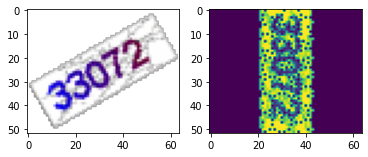

In [18]:
from hack_pca import hack_pca

# Hack different images yourself
src = plt.imread('1.gif')
plt.subplot(1, 2, 1)
plt.imshow(src)
img = hack_pca('1.gif')
plt.subplot(1, 2, 2)
plt.imshow(img)

(4,)


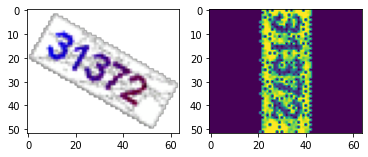

In [227]:
src = plt.imread('2.gif')
plt.subplot(1, 2, 1)
plt.imshow(src)
img = hack_pca('2.gif')
plt.subplot(1, 2, 2)
plt.imshow(img)

(4,)


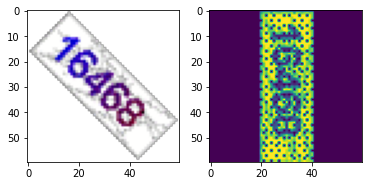

In [228]:
src = plt.imread('3.gif')
plt.subplot(1, 2, 1)
plt.imshow(src)
img = hack_pca('3.gif')
plt.subplot(1, 2, 2)
plt.imshow(img)

(4,)


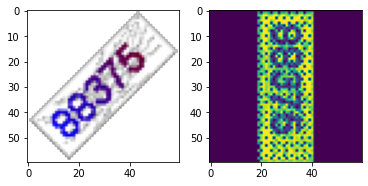

In [229]:
src = plt.imread('4.gif')
plt.subplot(1, 2, 1)
plt.imshow(src)
img = hack_pca('4.gif')
plt.subplot(1, 2, 2)
plt.imshow(img)

(4,)


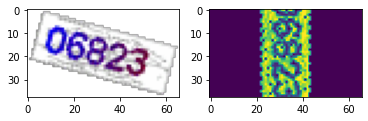

In [32]:
src = plt.imread('5.gif')
plt.subplot(1, 2, 1)
plt.imshow(src)
img = hack_pca('5.gif')
plt.subplot(1, 2, 2)
plt.imshow(img)

## Apply PCA on face image

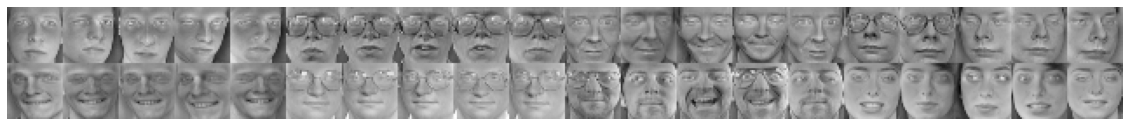

In [234]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

# 1. Feature preprocessing
# begin answer
fea_Train = fea_Train - np.mean(fea_Train, axis=0)
fea_Test = fea_Test - np.mean(fea_Test, axis=0)
# end answer
from show_face import show_face
show_face(fea_Train)

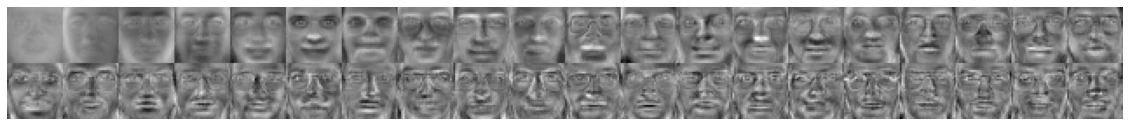

In [238]:
# 2. Run PCA
# begin answer
from pca import PCA
vec, val = PCA(fea_Train)
# end answer
# 3. Visualize eigenface
# begin answer
show_face(vec.T)
# end answer

dimension: 1 accuracy: 0.095
dimension: 2 accuracy: 0.215
dimension: 4 accuracy: 0.555
dimension: 8 accuracy: 0.745
dimension: 16 accuracy: 0.825
dimension: 24 accuracy: 0.835
dimension: 32 accuracy: 0.845
dimension: 64 accuracy: 0.865
dimension: 128 accuracy: 0.865


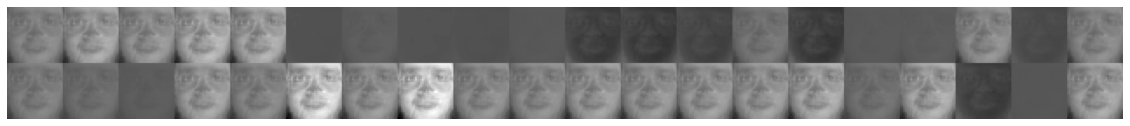

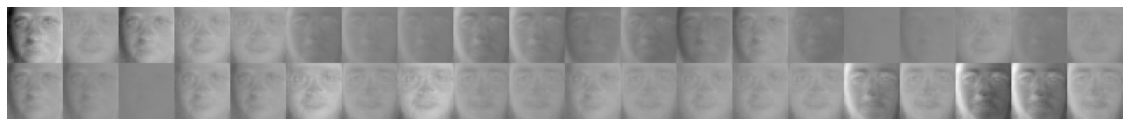

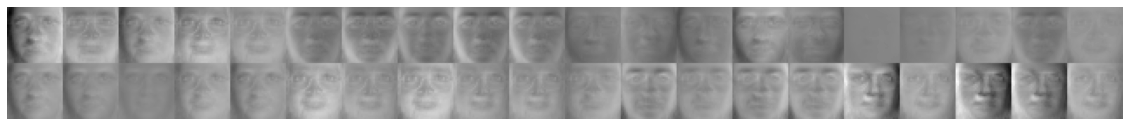

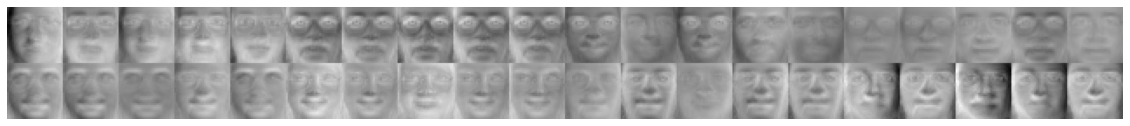

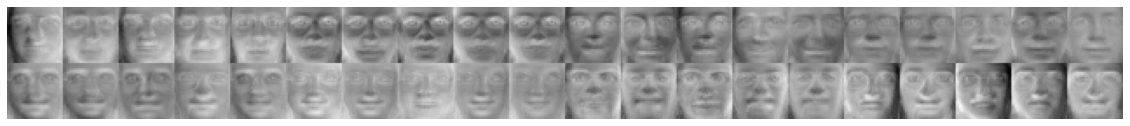

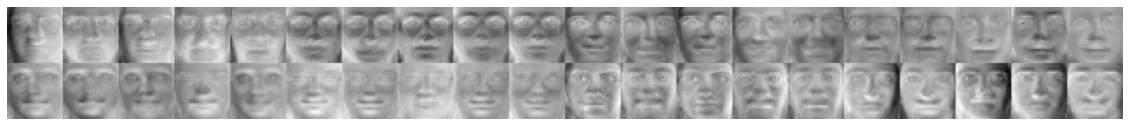

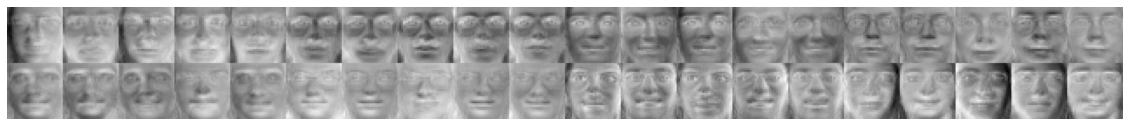

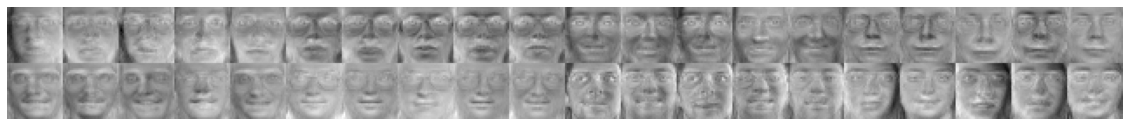

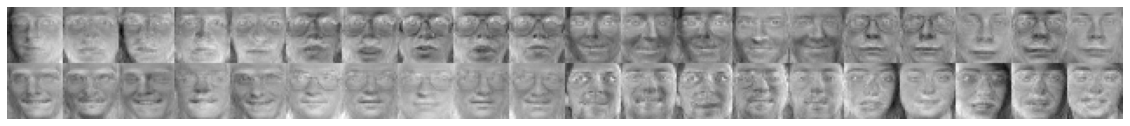

In [247]:
# 4. Project data on to low dimensional space
# begin answer
from knn import knn
for k in [1, 2, 4, 8, 16, 24, 32, 64, 128]:
    embbed_train = np.matmul(fea_Train, vec[:, :k])
    embbed_test = np.matmul(fea_Test, vec[:, :k])
# end answer

# 5. Run KNN in low dimensional space
# begin answer
    pred = knn(embbed_test, embbed_train, gnd_Train, 1)
    accu = np.sum(pred==gnd_Test) / pred.shape[0]
    print('dimension:', k, 'accuracy:', accu)
# end answer
# 6. Recover face images form low dimensional space, visualize them
# begin answer
    show_face(np.matmul(embbed_test, vec[:, :k].T))
# end answer  

## You are encouraged to apply LDA on this dataset!

dimension: 1 accuracy: 0.145
dimension: 2 accuracy: 0.37
dimension: 4 accuracy: 0.655
dimension: 8 accuracy: 0.885
dimension: 16 accuracy: 0.945
dimension: 32 accuracy: 0.955
dimension: 64 accuracy: 0.97
dimension: 128 accuracy: 0.97


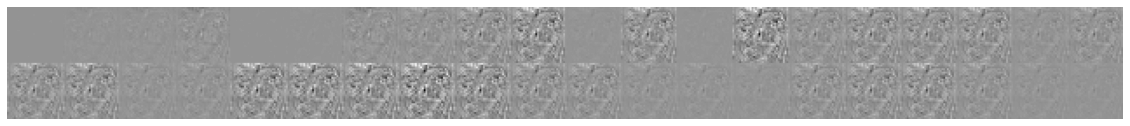

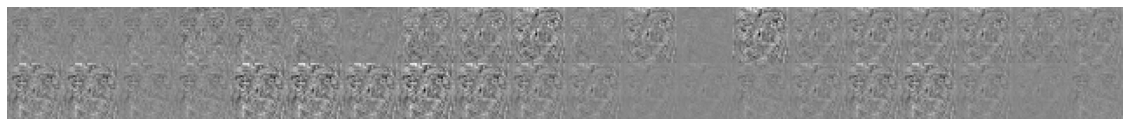

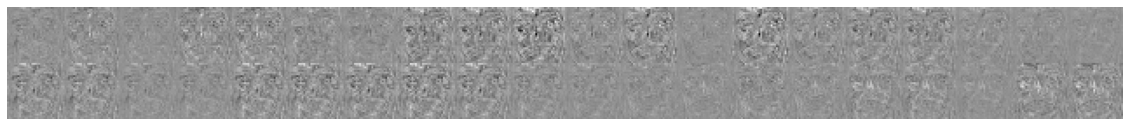

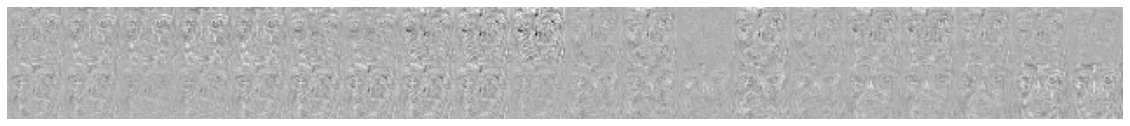

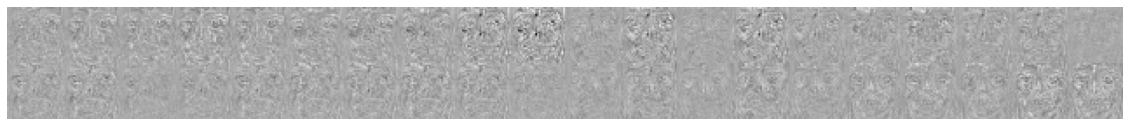

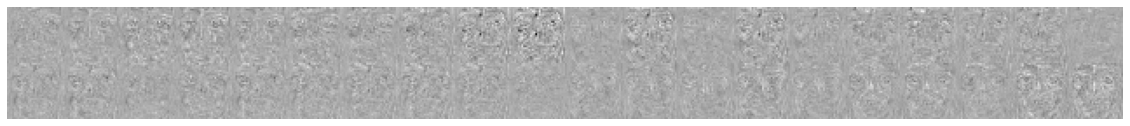

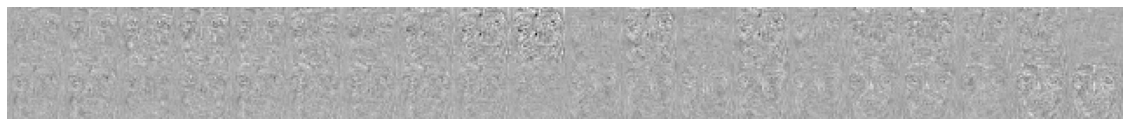

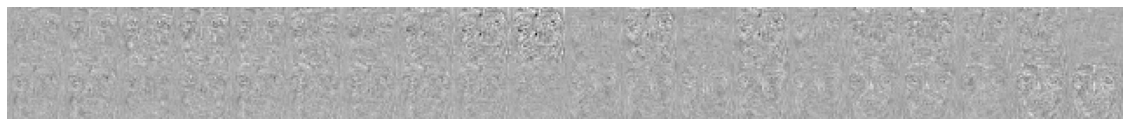

In [251]:
from LDA import LDA

# Your code here
# begin answer
vec, val = LDA(fea_Train, gnd_Train)
for k in [1, 2, 4, 8, 16, 32, 64, 128]:
    embbed_train = np.matmul(fea_Train, vec[:, :k])
    embbed_test = np.matmul(fea_Test, vec[:, :k])
    pred = knn(embbed_test, embbed_train, gnd_Train, 1)
    accu = np.sum(pred==gnd_Test) / pred.shape[0]
    print('dimension:', k, 'accuracy:', accu)
    show_face(np.matmul(embbed_test, vec[:, :k].T))
# end answer